[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drdave-teaching/OPIM5509Files/blob/main/OPIM5509_Module1_Files/3_AllTheModels_BostonHousing_Classification.ipynb)

# All the Models with Boston Housing **(Classification)**
-----------------------
**Dr. Dave Wanik**

We will use classification models instead of regression models - this will requires recoding the target variable and using 1) different error metrics for model evaluation and 2) confusion_matrix() and classification_report() instead of scatterplots.

## Getting started
Import modules, mount Drive, read in the data, check data types and missing values. You may also do some light EDA prior to modeling.

Notice how we are using the same functions over and over again... it really is like following a recipe.


In [ ]:
# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for classification modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# # mount your google drive
# from google.colab import drive
# drive.mount('/content/drive')
# # read in some data
# df = pd.read_csv('/content/drive/My Drive/OPIM 5509/Module 1: Python Bootcamp/Data/BostonHousing.csv')

In [ ]:
# read from shareable link
# https://drive.google.com/file/d/1ftXw37thrjI7NwPuDvm_HsOtNiSAOL1z/view?usp=sharing
# !gdown 1ftXw37thrjI7NwPuDvm_HsOtNiSAOL1z
# df = pd.read_csv('BostonHousing.csv')

# Link to the CSV file on Github
url = "https://raw.githubusercontent.com/drdave-teaching/OPIM5509Files/refs/heads/main/OPIM5509_Module1_Files/BostonHousing.csv"

# Read the data into a DataFrame
df = pd.read_csv(url)

In [ ]:
# data type, shape and columns

print("This is the shape :\n", df.shape, '\n') # escape characters are fun! \n adds a return line
print("These are the column names: \n", df.columns, '\n') # helps keep things nice and clean
print("These are the data types: \n", df.dtypes)

# right away you see this 'valid' column is an 'object', which means it's a string
# AKA something you can't do math on... look at the head and see what's going on
# in that column. ALL OTHER DATA IS NUMERIC (float64)

print("\nThis is the head:") # see how I can pop that \n anywhere?
df.head()   # also note how much stuff I have pasted in ONE CELL...
            # now you are cooking with gas!

# the head confirms to use that the valid column is some type of time/date stamp
# we need to stop what we are doing and take care of this NOW!

This is the shape :
 (506, 14) 

These are the column names: 
 Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object') 

These are the data types: 
 crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

This is the head:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# here's another cool way to get a lot of this info AND MORE
df.info() # gives you missing values report too - this is nice complete data

# data types, shape, missing values per columm.... pandas rocks...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Data splitting
Subset your data into X features and Y target variable for modeling. Convert X and Y to numpy arrays. Then use train_test_split for data splitting (80/20 is very common); don't forget random seed and shuffle.

In [ ]:
# one extra step here - we are making up our own problem.
# we want to predict if a house price is greater than the median
# so i will use a numpy.where() statement to do this
df['medv'] = np.where(df['medv'] > df['medv'].median(),
                      1,
                      0)

# check your work - looks good
df['medv'].head()

,medv
0,1
1,1
2,1
3,1
4,1


In [ ]:
df['medv'].value_counts()

,count
medv,
0,256
1,250


In [ ]:
# the target variable is Y
# we know that this is 'medv'
Y = df['medv']
print(Y.shape) # a single column with 506 rows

(506,)


In [ ]:
# everything else is X
# so just drop 'medv' and you are done
X = df.drop('medv', axis=1)
print(X.shape) # note that we have gone from 14 to 13 columns, this is good! 506 rows.

(506, 13)


In [ ]:
# now, split the data in ONE LINE OF CODE
# notice how we are assigning four different variables at once
# this makes it really clean

# be careful of capital vs. lowercase X and Y, you might get an error...
# notice the 80/20 split we perform

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [ ]:
# check your work - does the shape match what you think it should be?
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [ ]:
# convert these all to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Min/Max Scaling
This will ensure all of your X data is between 0 (min) and 1 (max). You will use fit_transform() on the train data first, then fit on the test data. If you don't do this step after splitting, you will have data leakage.

Only scale the X data, not the Y data!

Do yourself a favor and just overwrite X_train and X_test when standardizing, as I do below. Min/max scaling requires that the data are numpy arrays and all numeric data.


**Like this example:**
```
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```


In [ ]:
# you probably have already imported the MinMaxScale at the top of your script
# you should convert to numpy array before scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# if you wanted to run summary stats on these to check the range,
# you would need to convert to a pandas dataframe.
tmp = pd.DataFrame(X_train)
tmp.describe() # notice how all the max values are 1, all min values are 0.

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.040465,0.115693,0.379446,0.071782,0.352848,0.498859,0.676173,0.243577,0.363323,0.414184,0.608332,0.897570,0.296009
std,0.099757,0.231525,0.255356,0.258447,0.242190,0.144285,0.288310,0.193802,0.373466,0.317123,0.237096,0.230890,0.196203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000814,0.000000,0.162593,0.000000,0.137860,0.412345,0.439238,0.087140,0.130435,0.175573,0.446809,0.945969,0.139142
50%,0.002836,0.000000,0.289630,0.000000,0.314815,0.477324,0.770340,0.186066,0.173913,0.272901,0.648936,0.985892,0.253725
75%,0.035900,0.200000,0.642963,0.000000,0.506173,0.564114,0.934604,0.388400,0.478261,0.914122,0.808511,0.997113,0.404042
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# if you wanted to run summary stats on these to check the range,
# you would need to convert to a pandas dataframe.
tmp = pd.DataFrame(X_test)
tmp.describe() # notice how all the max values are 1, all min values are 0.

# sometimes it's less, sometimes it's more!

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.040710,0.105490,0.407324,0.058824,0.334586,0.467324,0.677117,0.237644,0.404945,0.453993,0.680747,0.902520,0.322799
std,0.083847,0.240832,0.248984,0.236456,0.223462,0.135006,0.297537,0.182847,0.398343,0.338669,0.191551,0.228559,0.199906
min,-0.000031,0.000000,-0.010370,0.000000,0.014403,-0.061420,0.033986,0.003592,0.000000,0.001908,0.042553,0.016037,0.031733
25%,0.000880,0.000000,0.198611,0.000000,0.130144,0.408227,0.421215,0.103152,0.130435,0.180821,0.617021,0.944828,0.164390
50%,0.002257,0.000000,0.364815,0.000000,0.302469,0.469290,0.739444,0.202221,0.173913,0.301527,0.702128,0.988161,0.292632
75%,0.050731,0.000000,0.642963,0.000000,0.486626,0.532083,0.950824,0.330568,1.000000,0.914122,0.808511,1.000000,0.449434
max,0.514089,0.950000,1.000000,1.000000,1.000000,0.848281,1.000000,0.871218,1.000000,1.000000,1.000000,1.000000,0.972682


## Fit The Model
Fit the model and make new variables to save your train and test predictions. Make sure you are using the appropriate regression or classification model.

Notice how we're using the same training data and test data for each model - this is critical!

Also note that in many StackOverflow examples, folks don't use 'DTR' or 'LR' as variable names for their models - instead, they often use 'clf' which stands for classifier. Helps you abstract what's going on.

### Logistic Regression

In [ ]:
# make a variable to store the general model
LR = LogisticRegression()
# fit the model - one line of code
LR = LR.fit(X_train, y_train)

In [ ]:
# store the predictions
train_preds_LR = LR.predict(X_train)
test_preds_LR = LR.predict(X_test)

In [ ]:
train_preds_LR

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,

### DTC

Check out the model documentation:

**DTC Model Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


Some extra content to think about...

**Link:** https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

**Link:** https://scikit-learn.org/stable/modules/tree.html

In [ ]:
# make a variable to store the general model
# you can accept all of the defaults...
DTC = DecisionTreeClassifier()
# or start to 'tinker'
#DTR = DecisionTreeRegressor(criterion='mae',
#                            min_samples_split=15) # make this bigger and the tree will shrink!

# fit the model - one line of code
DTC = DTC.fit(X_train, y_train)

In [ ]:
# store the predictions
train_preds_DTC = DTC.predict(X_train)
test_preds_DTC = DTC.predict(X_test)

In [ ]:
train_preds_DTC

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,

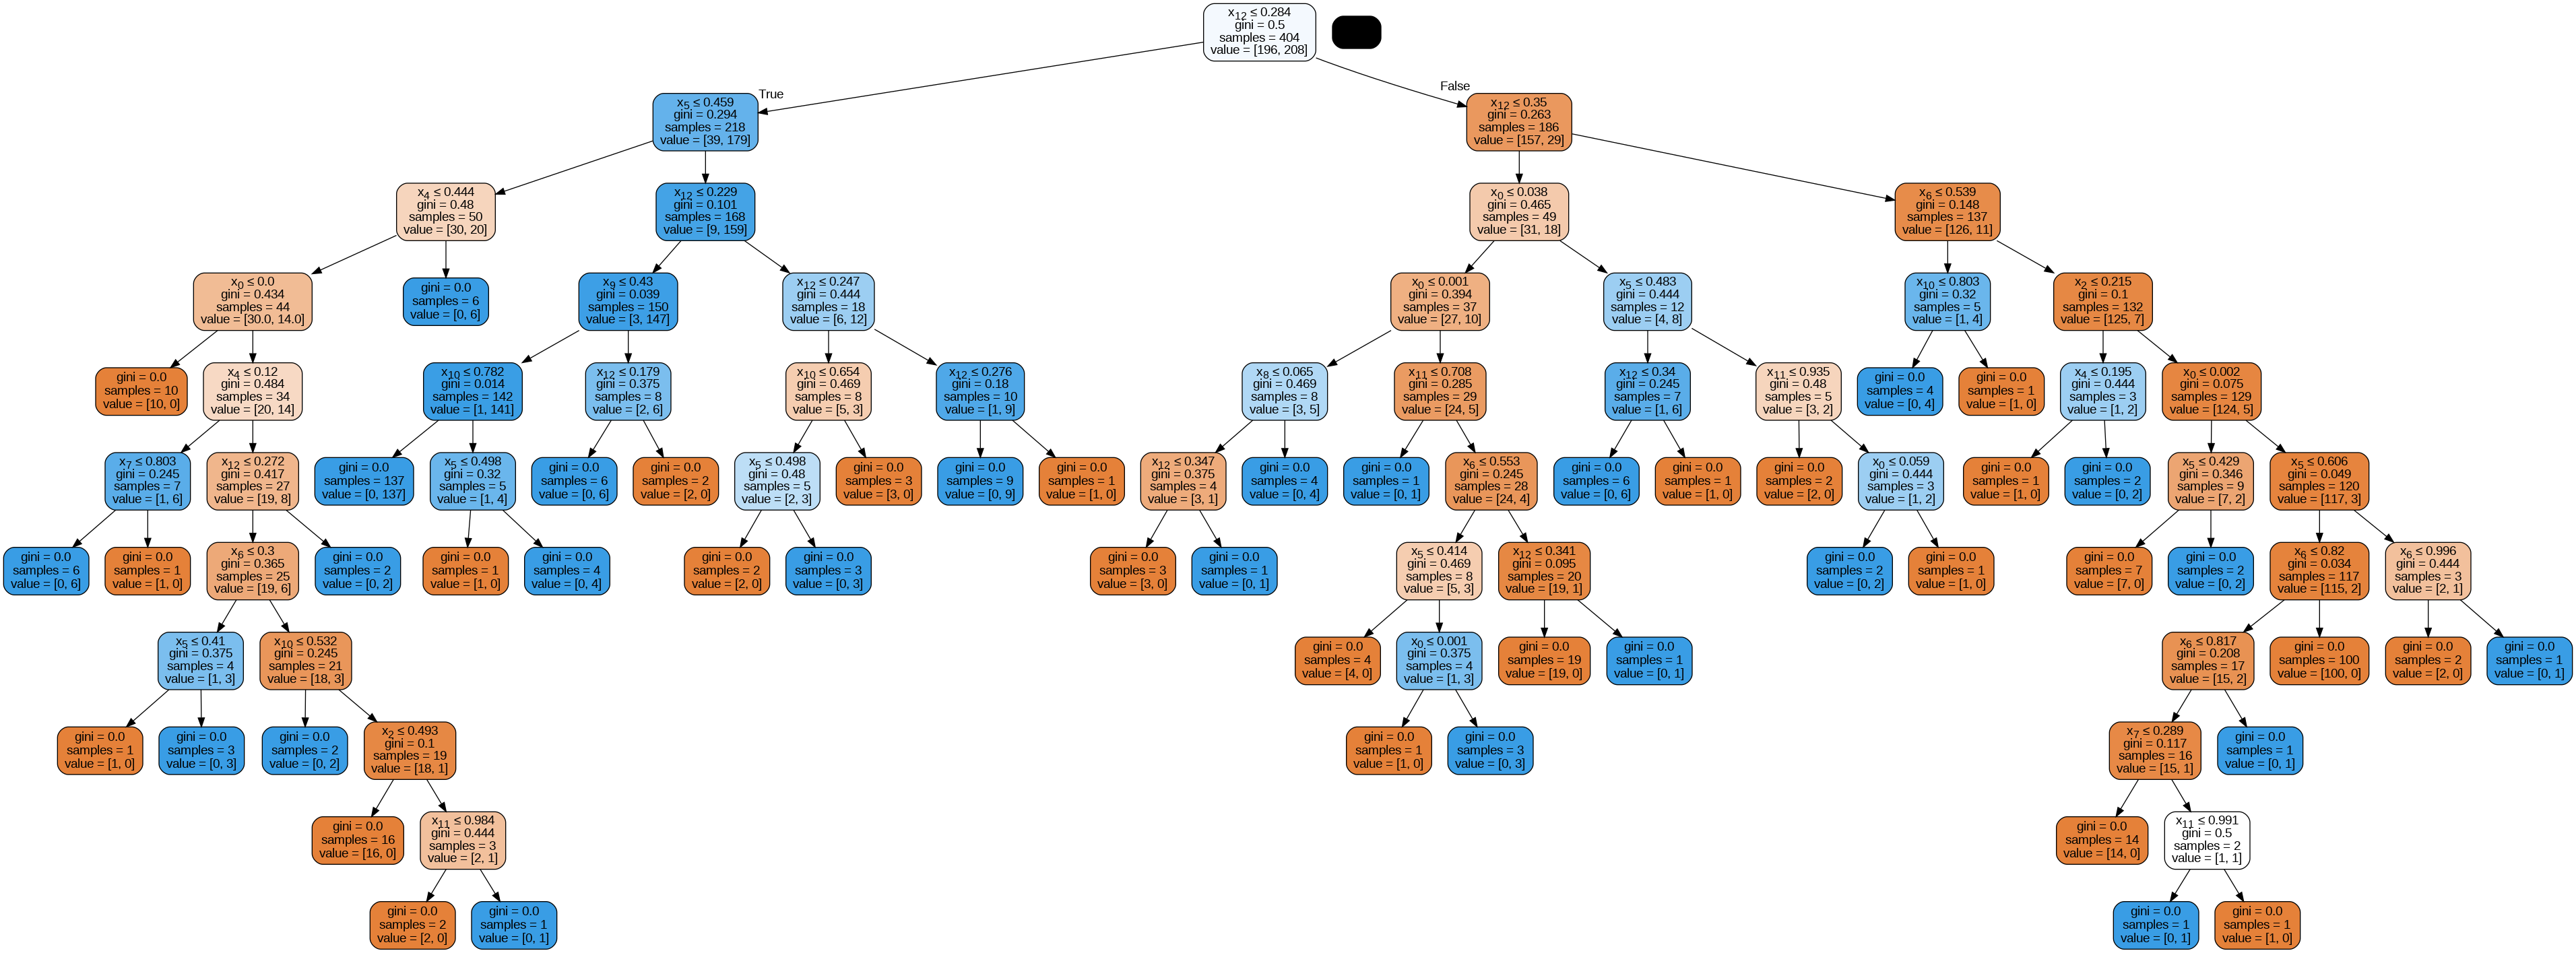

In [ ]:
# show the tree
# link: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(DTC,  # this is the name of your model!
                out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# hard to see, but that's OK!
# we will learn about partial depenence
# and feature importance with is way easier to see than this

# for now, just appreciate how awesome this looks!
# double click and you can see more

### RFC

In [ ]:
# make a variable to store the general model
# you can accept all of the defaults...
RFC = RandomForestClassifier()
# or start to 'tinker'

# fit the model - one line of code
RFC = RFC.fit(X_train, y_train)

# store the predictions
train_preds_RFC = RFC.predict(X_train)
test_preds_RFC = RFC.predict(X_test)

## Evaluate the Model
Look at the appropriate error metrics depending on the problem you are solving.

For a regression problem, look at the R2, MAE and MSE; then make a scatterplot of actual vs. predicted values with nice labels and titles.

For a classification problem, create the classification report (gives a confusion matrix and useful metrics in one line of code).

See how we are just tacking on a suffix like '_LR' or '_DTR' on the end of things? Keep your code clean and you can just copy paste. Same stuff as before, but we need to be organized since we are introducing more models.

## Confusion Matrix
Look for 'consistency' between the two partitions (train and test)!

### LR


In [ ]:
# train confusion matrix
confusion_matrix(y_train, train_preds_LR)

array([[161,  35],
       [ 27, 181]])

In [ ]:
# test confusion matrix
confusion_matrix(y_test, test_preds_LR)

array([[51,  9],
       [ 6, 36]])

In [ ]:
# extract TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_LR).ravel()
(tn, fp, fn, tp)

(51, 9, 6, 36)

### DTC

In [ ]:
# train confusion matrix
confusion_matrix(y_train, train_preds_DTC)

array([[196,   0],
       [  0, 208]])

In [ ]:
# test confusion matrix
confusion_matrix(y_test, test_preds_DTC)

array([[47, 13],
       [ 3, 39]])

In [ ]:
# extract TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_DTC).ravel()
(tn, fp, fn, tp)

(47, 13, 3, 39)

### RFC

In [ ]:
# train confusion matrix
confusion_matrix(y_train, train_preds_RFC)

array([[196,   0],
       [  0, 208]])

In [ ]:
# test confusion matrix
confusion_matrix(y_test, test_preds_RFC)

array([[51,  9],
       [ 5, 37]])

In [ ]:
# extract TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_RFC).ravel()
(tn, fp, fn, tp)

(51, 9, 5, 37)

## Classification Report

### LR

In [ ]:
# train report
trainReport_LR = classification_report(y_train, train_preds_LR)
print(trainReport_LR)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       196
           1       0.84      0.87      0.85       208

    accuracy                           0.85       404
   macro avg       0.85      0.85      0.85       404
weighted avg       0.85      0.85      0.85       404



In [ ]:
# test report
testReport_LR = classification_report(y_test, test_preds_LR)
print(testReport_LR)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        60
           1       0.80      0.86      0.83        42

    accuracy                           0.85       102
   macro avg       0.85      0.85      0.85       102
weighted avg       0.86      0.85      0.85       102



### DTC

In [ ]:
# train report
trainReport_DTC = classification_report(y_train, train_preds_DTC)
print(trainReport_DTC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00       208

    accuracy                           1.00       404
   macro avg       1.00      1.00      1.00       404
weighted avg       1.00      1.00      1.00       404



In [ ]:
# test report
testReport_DTC = classification_report(y_test, test_preds_DTC)
print(testReport_DTC)

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        60
           1       0.75      0.93      0.83        42

    accuracy                           0.84       102
   macro avg       0.84      0.86      0.84       102
weighted avg       0.86      0.84      0.84       102



### RFC

In [ ]:
# train report
trainReport_RFC = classification_report(y_train, train_preds_RFC)
print(trainReport_RFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00       208

    accuracy                           1.00       404
   macro avg       1.00      1.00      1.00       404
weighted avg       1.00      1.00      1.00       404



In [ ]:
# test report
testReport_RFC = classification_report(y_test, test_preds_RFC)
print(testReport_RFC)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        60
           1       0.80      0.88      0.84        42

    accuracy                           0.86       102
   macro avg       0.86      0.87      0.86       102
weighted avg       0.87      0.86      0.86       102



# Done!
Which model is best? Just compare the accuracy across all models! You really only care about test results for model comparison (this shows how well the model generalizes).

Later on, you will expand on these topics and start fitting multiple models, and may start tweaking them ('hyperparameter tuning') to get even better peformance. Sit tight!

In [ ]:
# import pkg_resources
# import types
# def get_imports():
#     for name, val in globals().items():
#         if isinstance(val, types.ModuleType):
#             # Split ensures you get root package,
#             # not just imported function
#             name = val.__name__.split(".")[0]

#         elif isinstance(val, type):
#             name = val.__module__.split(".")[0]

#         # Some packages are weird and have different
#         # imported names vs. system/pip names. Unfortunately,
#         # there is no systematic way to get pip names from
#         # a package's imported name. You'll have to add
#         # exceptions to this list manually!
#         poorly_named_packages = {
#             "PIL": "Pillow",
#             "sklearn": "scikit-learn"
#         }
#         if name in poorly_named_packages.keys():
#             name = poorly_named_packages[name]

#         yield name
# imports = list(set(get_imports()))

# # The only way I found to get the version of the root package
# # from only the name of the package is to cross-check the names
# # of installed packages vs. imported packages
# requirements = []
# for m in pkg_resources.working_set:
#     if m.project_name in imports and m.project_name!="pip":
#         requirements.append((m.project_name, m.version))

# for r in requirements:
#     print("{}=={}".format(*r))

# # Save to requirements.txt
# with open("requirements.txt", "w") as file:
#     for n in requirements:
#         file.write("{}=={}\n".format(*n))

# print("requirements.txt has been created in the current directory!")